# TP 3 : Mouvement Brownien

## Exercice 1 : Simulation d'un mouvement brownien

### Importation des librairies

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
from math import *

### Réponses aux questions

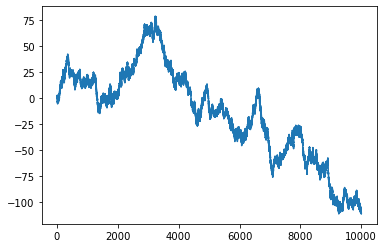

TypeError: unsupported operand type(s) for *: 'int' and 'NoneType'

In [154]:
#Exercice b
def W(T,n):
    dt = T/n
    w = (np.sqrt(dt)*np.random.standard_normal(n)).cumsum() #On fait une somme cumulée du produit entre dt et une loi N
    w = np.insert(w,0,0)#On ajoute le premier élément de notre tableau qui est 0 
    t = np.arange(0,T+dt,dt)#On crée un tableau commençant à 0 est allant jusqu'à T+dt avec un pas de dt
    plt.plot(t,w)
    plt.show()

#Exercice c
def W1(T,N,n):
    dt = T/n #pas
    w = (np.sqrt(dt) * np.random.standard_normal((N,n))).cumsum(1) # On fait une somme cumulée du produit entre dt et une loi N
    #Ici, on a une matrice, on fait donc la somme cumulée sur les lignes du tableau
    w_0 = np.zeros(N) # On initialise un vecteur de 0
    w = np.insert(w,0,w_0,axis=1) #On rajoute ce vecteur 
    t = np.arange(0, T+dt, dt) # on crée un vecteur de valeur régulière entre 0 et T+dt
    plt.plot(t, w.T)
    plt.show()
    

#exercice d
    
T = 10000
n = T * 10
dt = T / n
mu = 1
sigma = 1
t = np.arange(0, T+dt,  dt)
x = mu * t + sigma * W(T,n)
plt.plot(t,x/t)
plt.hlines(y=mu,xmin=0,xmax=T,colors="r")
plt.show()


### Affichage


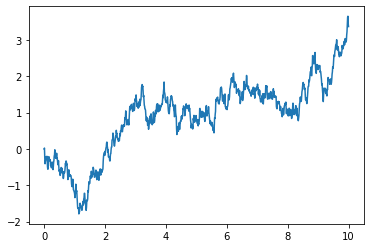

None


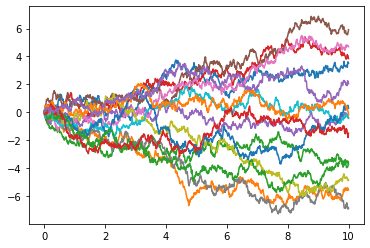


None


In [119]:
print(W(10,1000))
print(W1(10,15,1000))

    
    

## Exercice 2 : Simulation de solutions d'EDS

### Euler-Maruyama

In [174]:
def EulerMaruyama(x_0,a,sigma,T,n):
    dt = T / n
    z = np.random.standard_normal(n) #loi normale
    x_init = 1 + a * dt + sigma * np.sqrt(dt) * z # sans le 1+ , on obtient un pourcentage et des nombres très proches de 0
    x = x_0 * x_init.cumprod()
    x = np.insert(x,0,x_0)
    np.arange(0,T+dt,dt)
    return x
print(EulerMaruyama(5,2,2,1,100))



[ 5.          6.63527852  6.20188033  7.06271029  8.42217748 10.46984221
  8.10047003 10.33063393 10.94965159 10.90787419 11.53257446 10.87284577
  9.60864911 12.58753545 13.69509322 19.31636297 18.42226946 22.13651928
 23.36604265 21.01870958 20.20362051 21.41611737 13.34146816 12.7510034
 13.16801988 16.12110345 21.29400176 20.79600931 12.65010835  7.80319059
  9.3309967   6.75574766  6.87063652  6.49050204  3.68978946  4.33511185
  3.67348199  3.81790101  2.33708018  2.60244409  3.21596015  3.21322679
  4.20534309  4.87101142  4.42590385  3.70307388  3.89180739  5.62435668
  7.09292505  5.06584767  6.5141201   6.19562305  7.39929594  7.66143113
  9.15409939  9.31168606 10.51084089 11.91279314  8.12019681 10.85894966
  9.9673377  11.05846882 13.96947205 14.74070197 11.11303199  9.67880775
 13.54233174 18.23198921 14.54051786 13.50916519 13.24808936 14.43031948
 12.68201794 15.49425877 11.14871342 11.78206629 10.92183539 14.51301072
 13.25900201 10.38980951  8.50084176 10.04010148 11.

### Mouvement Brownien Géometrique

In [172]:
def MBG(x_0,a,s,T,n):
    dt = T/n
    t = dt * np.arange(n+1)
    w = (np.sqrt(dt) * np.random.standard_normal(n)).cumsum()
    w = np.insert(w,0,0)
    x = x_0*np.exp((a-s**2/2)*t+s*w)
    return x
print(MBG(5,2,2,1,100))
    

[ 5.          5.76053229  5.89370408  5.84374671  9.53953403 13.9808525
 16.62903547 18.70560902 20.94609303 15.92410148 14.33739821 11.08504281
 10.07183665 11.95730306 14.07475207 16.94460625 10.66843306 12.05231344
 12.41160627 10.88569038  8.62301201  7.90515956  9.23409866  9.75518599
 11.94385105 11.48840654 10.41286434 11.81864656 15.53979341 19.74479573
 24.55343693 29.41920038 30.20171759 29.5278165  31.22146338 22.09958286
 24.87037905 30.8410484  36.02940952 49.96281472 34.24472802 32.94931136
 30.65863679 27.43835307 26.04062424 22.58931306 22.18789479 23.55298947
 36.25187094 40.55433293 60.54538998 56.16805575 49.76051515 60.32476702
 56.94112054 57.84195458 61.54088355 55.47730497 54.58930432 39.09410479
 47.23849193 55.42777032 41.48300965 41.76961068 39.33077899 39.9016434
 33.88779974 29.65027263 32.54752828 23.10403777 25.09875366 29.41257516
 22.5740453  24.93338488 40.66935137 37.49947028 40.24835268 49.20880626
 44.31435835 45.99009993 37.93278595 36.49368139 31.0

### Affichage

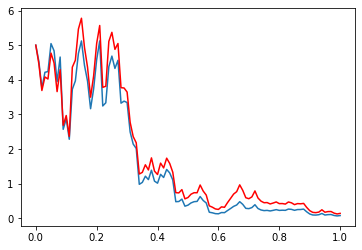

None


In [212]:
def Graphe_EM_MBG(x0,a,sigma,T,n):
    dt = T / n
    t = np.arange(0, T+dt, dt)

    z = np.random.standard_normal(n)

    w = (np.sqrt(pas)*z).cumsum()
    w = np.insert(w, 0, 0)

    x_init = 1+ a * pas + sigma * np.sqrt(pas) * z
    x = x0 * x_init.cumprod()
    x = np.insert(x,0,x0)
    y = x0 * np.exp((a-sigma **2/2)*t + sigma * w)
    plt.plot(t,x)
    plt.plot(t,y,'r')
    plt.show()
print(Graphe_EM_MBG(5,1,2,1,100))

### Algorithme de Milshteinn

C:\Users\cleme\AppData\Local\Temp\ipykernel_10864\1272443469.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  X[k+1] = X[k]*(1-0.5*pas) + np.sqrt(1-X[k]**2)*np.sqrt(pas)*z[k] - 0.5*X[k]/np.sqrt(1-X[k]**2)*pas*(z[k]**2-1)
C:\Users\cleme\AppData\Local\Temp\ipykernel_10864\1272443469.py:12: RuntimeWarning: invalid value encountered in sqrt
  X[k+1] = X[k]*(1-0.5*pas) + np.sqrt(1-X[k]**2)*np.sqrt(pas)*z[k] - 0.5*X[k]/np.sqrt(1-X[k]**2)*pas*(z[k]**2-1)


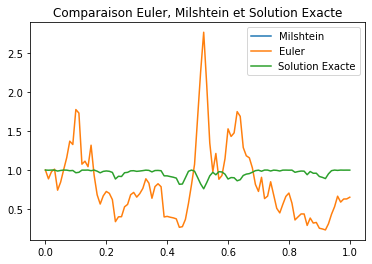

[1.         0.88727516 0.97995328 1.01166532 0.74205015 0.84551907
 1.00516876 1.15931197 1.37029861 1.32740648 1.77546479 1.73087142
 1.07539555 1.11350331 1.04325131 1.3184712  0.9341322  0.6825806
 0.56431847 0.66904168 0.72551252 0.70141227 0.62105553 0.33852967
 0.40050647 0.40230848 0.52864448 0.55955306 0.68358387 0.71324387
 0.6529884  0.69782673 0.7643959  0.88807398 0.83169278 0.63843568
 0.78791391 0.82429324 0.78618609 0.39903707 0.40619592 0.39554968
 0.38740313 0.37445053 0.26588661 0.27417452 0.36751943 0.57266861
 0.81372417 1.07432328 1.66867998 2.25918587 2.76645354 2.08872635
 1.34590171 0.97920363 1.21274276 0.88232974 0.93049359 1.1452489
 1.52817754 1.43071444 1.47656647 1.7491371  1.68835618 1.2884435
 1.18302244 1.15677228 1.02699172 0.81523588 0.72593676 0.90695205
 0.63422897 0.66592335 0.84981322 0.68005918 0.50940001 0.4510208
 0.5606179  0.66209332 0.70527915 0.57539871 0.3604296  0.39969742
 0.43738615 0.43714087 0.29022781 0.38483862 0.32062162 0.32843587

In [223]:
def Comp_Milshtein(x0,a,sigma,T,n):
    pas = T / n
    t = np.arange(0, T+pas, pas)
    z=np.random.standard_normal(n)

    w=(np.sqrt(pas)*z).cumsum()
    w=np.insert(w,0,0)

    X = np.zeros(n+1)
    X[0] = x0
    for k in range(0,n):
        X[k+1] = X[k]*(1-0.5*pas) + np.sqrt(1-X[k]**2)*np.sqrt(pas)*z[k] - 0.5*X[k]/np.sqrt(1-X[k]**2)*pas*(z[k]**2-1)

    x_init = 1+2 * pas + 2 * np.sqrt(pas) * z
    
    x = x0 * x_init.cumprod()
    x = np.insert(x,0,1)

    y = 1*np.exp((2-sigma**2/2)*t+2*w)

    b = np.sin(w + np.arcsin(x0))

    plt.figure()
    plt.plot(t,X,label="Milshtein")
    plt.plot(t,x,label="Euler")
    plt.plot(t,b,label="Solution Exacte")
    plt.legend()
    plt.title("Comparaison Euler, Milshtein et Solution Exacte")
    plt.show()
    print(x)
print(Comp_Milshtein(1,1,2,1,100))

    